## Laptop price predication 

In [61]:
print(2)

2


In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [208]:
df = pd.read_csv('laptop_data.csv')

In [209]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [210]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [212]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [213]:
df.corr(numeric_only=True)

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


In [214]:
df.duplicated().sum()

np.int64(0)

In [215]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [216]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [217]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [218]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [219]:
##remove str and extract number in ram and weight columns 
df['Ram']=df['Ram'].str.extract('(\d+)')
df['Weight']=df['Weight'].str.extract('(\d+)')

<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:3: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:3: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\DELL\AppData\Local\Temp\ipykernel_6180\4290367054.py:2: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['Ram']=df['Ram'].str.extract('(\d+)')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6180\4290367054.py:3: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences wi

In [220]:
##Convert the string into int or flaot 
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].astype(float)

In [221]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [222]:
##Extract TouchScreen 
df['IsToucScreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x.split() else 0)

<Axes: xlabel='Company'>

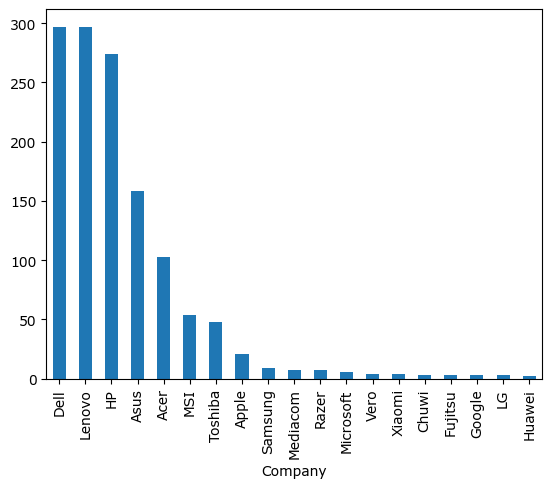

In [223]:
df['Company'].value_counts().plot.bar()

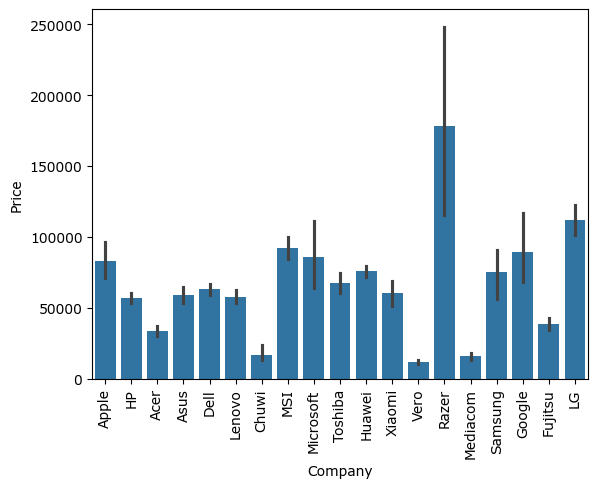

In [224]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

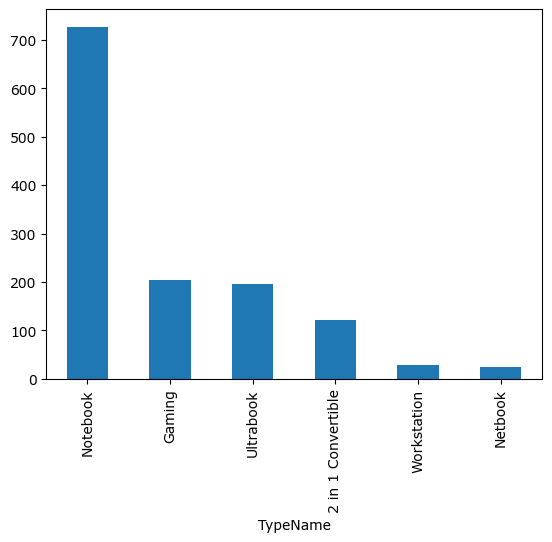

In [225]:
##TypeName
df['TypeName'].value_counts().plot.bar()

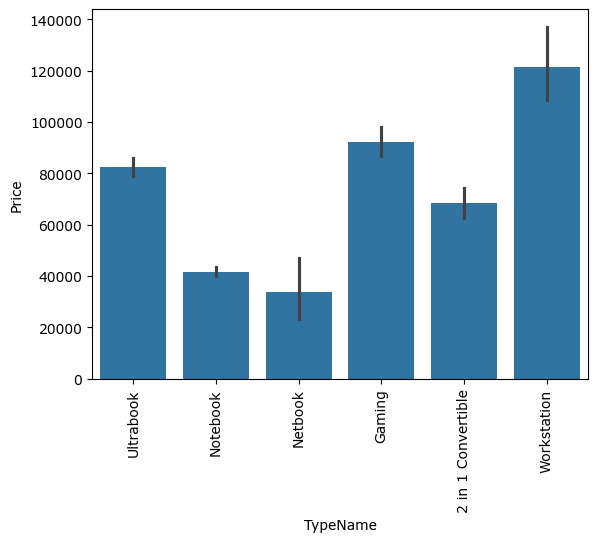

In [226]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [227]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen
979,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.0,93186.72,0
45,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8,256GB SSD,Intel Iris Graphics 540,macOS,1.0,75604.32,0
472,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,128GB SSD,Intel HD Graphics 615,Chrome OS,1.0,67932.00,1


<Axes: xlabel='Inches', ylabel='Price'>

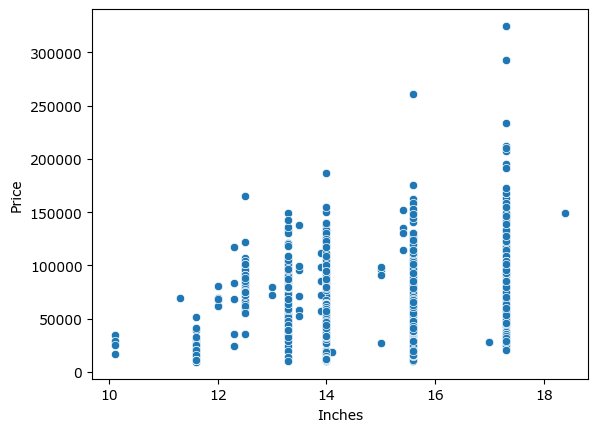

In [228]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  IsToucScreen      1303 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 122.3+ KB


In [230]:
df['Cpu_GHz']=df['Cpu'].apply(lambda x:x.split()[-1]).str.replace('GHz','')

In [231]:
df['Cpu_GHz']=df['Cpu_GHz'].astype('float')

In [232]:
df['Processer']=df['Cpu'].apply(lambda x:' '.join(x.split(' ')[:-1]))

In [233]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5 7200U
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5


In [234]:
df['Gpu_type']=df['Gpu'].apply(lambda x:' '.join(x.split()[:-1]))

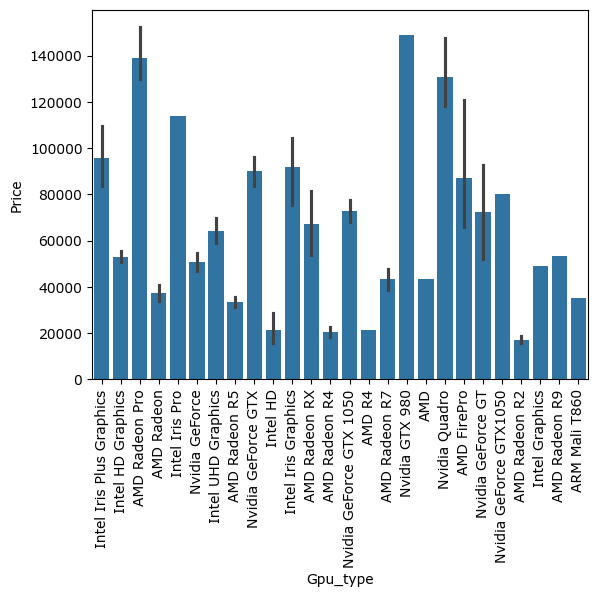

In [235]:
sns.barplot(x=df['Gpu_type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [236]:
df['Gpu'].apply(lambda x:x.split()[-1]).unique()

array(['640', '6000', '620', '455', '650', 'R5', 'Graphics', 'MX150',
       '520', '555', 'M430', '615', '560', '940MX', '400', '1050', 'R2',
       '530', '930MX', '500', '1060', '150MX', '540', '580', '920MX',
       '1070', 'Ti', 'MX130', '920M', 'M445', '550', '1050M', '515',
       'M420', '505', 'SLI', 'R17M-M1-70', '1080', 'M1200', '950M',
       'W4190M', '980M', '930M', '630', '430', '940M', '510', '405',
       'W5130M', 'M2200M', 'R4', 'M620', 'M460', '965M', 'GTX1080',
       '960M', 'M620M', '970M', '960<U+039C>', '960', 'M440', 'R7',
       'M520M', 'M2200', 'M2000M', 'M1000M', '1070M', 'GTX1060', '5300',
       'M420X', '920', 'M465', 'R3', '1050Ti', 'M365X', 'M385', '3000M',
       '980', 'M330', 'W6150M', 'M315', 'M500M', 'M360', 'M3000M', 'MP4'],
      dtype=object)

In [237]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5,Intel Iris Plus Graphics
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5,Intel HD Graphics
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5 7200U,Intel HD Graphics
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7,AMD Radeon Pro
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5,Intel Iris Plus Graphics


In [238]:
screen =df['ScreenResolution'].apply(lambda x:x.split()[-1])

In [239]:
df['X_res']=screen.apply(lambda x:x.split('x')[1]).astype('int')
df['Y_res']=screen.apply(lambda x:x.split('x')[-1]).astype('int')

In [240]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.173722
Price           1.000000
IsToucScreen    0.191226
Cpu_GHz         0.430293
X_res           0.552809
Y_res           0.552809
Name: Price, dtype: float64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  IsToucScreen      1303 non-null   int64  
 12  Cpu_GHz           1303 non-null   float64
 13  Processer         1303 non-null   object 
 14  Gpu_type          1303 non-null   object 
 15  X_res             1303 non-null   int64  
 16  Y_res             1303 non-null   int64  


In [242]:
df['Cpu_GHz'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

<Axes: xlabel='Cpu_GHz', ylabel='Price'>

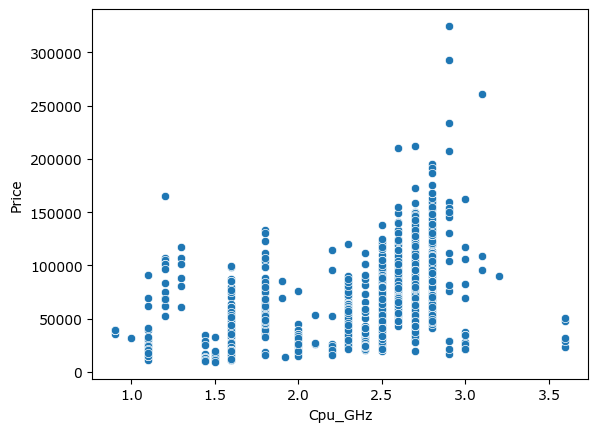

In [243]:
sns.scatterplot(x=df['Cpu_GHz'],y=df['Price'])

In [244]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5,Intel Iris Plus Graphics,1600,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5,Intel HD Graphics,900,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5 7200U,Intel HD Graphics,1080,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7,AMD Radeon Pro,1800,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5,Intel Iris Plus Graphics,1600,1600


In [245]:
df['Processer']=df['Processer'].apply(lambda x:" ".join(x.split()[:3]))

In [246]:
for i in df['Processer'].unique():
    print(i)

Intel Core i5
Intel Core i7
AMD A9-Series 9420
Intel Core i3
Intel Core M
Intel Atom x5-Z8350
AMD E-Series E2-9000e
Intel Atom x5-Z8300
AMD E-Series E2-6110
AMD A6-Series 9220
Intel Celeron Dual
AMD Ryzen 1700
Intel Pentium Quad
Intel Atom x5-Z8550
AMD FX 9830P
AMD E-Series 6110
Intel Xeon E3-1505M
AMD E-Series 9000e
AMD A10-Series A10-9620P
AMD A6-Series A6-9220
AMD A10-Series 9600P
AMD A8-Series 7410
AMD A12-Series 9720P
Intel Celeron Quad
AMD Ryzen 1600
AMD A10-Series 9620P
AMD E-Series 7110
AMD A9-Series A9-9420
Intel Xeon E3-1535M
AMD E-Series E2-9000
AMD A6-Series 7310
Intel Atom Z8350
Intel Pentium Dual
AMD A12-Series 9700P
AMD A4-Series 7210
AMD FX 8800P
Intel Atom X5-Z8350
Samsung Cortex A72&A53
AMD E-Series 9000
AMD A9-Series 9410


In [247]:
def formated(text):
    if text=="Intel Core i5" or text == "Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other intel Processer"
        else:
            return "AMD Processer"

In [248]:
df['Processers']=df['Processer'].apply(formated)

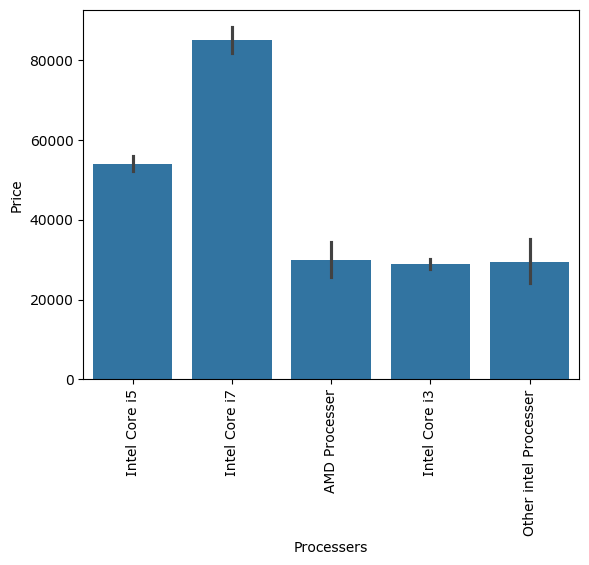

In [249]:
sns.barplot(x=df['Processers'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [250]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,X_res,Y_res,Processers
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5,Intel Iris Plus Graphics,1600,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5,Intel HD Graphics,900,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5,Intel HD Graphics,1080,1080,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7,AMD Radeon Pro,1800,1800,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5,Intel Iris Plus Graphics,1600,1600,Intel Core i5


In [251]:
##making one columns pf PPI by using three columns X_res,y_res,Inches for reduce dimesions 

df['PPI']=(df['X_res'] **2 + df['Y_res'] **2)/df['Inches']
df.drop(['X_res','Y_res','Inches'],axis=1,inplace=True)

In [252]:
##remove the CPu and ScreenResolution after extracting useful information 
df.drop(['ScreenResolution','Cpu'],axis=1,inplace=True)

In [253]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,Processers,PPI
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5,Intel Iris Plus Graphics,Intel Core i5,384962.406015
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5,Intel HD Graphics,Intel Core i5,121804.511278
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5,Intel HD Graphics,Intel Core i5,149538.461538
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7,AMD Radeon Pro,Intel Core i7,420779.220779
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5,Intel Iris Plus Graphics,Intel Core i5,384962.406015


In [254]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [255]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [256]:
df = df[df['Gpu_brand']!='ARM']

In [257]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='Gpu_brand', ylabel='Price'>

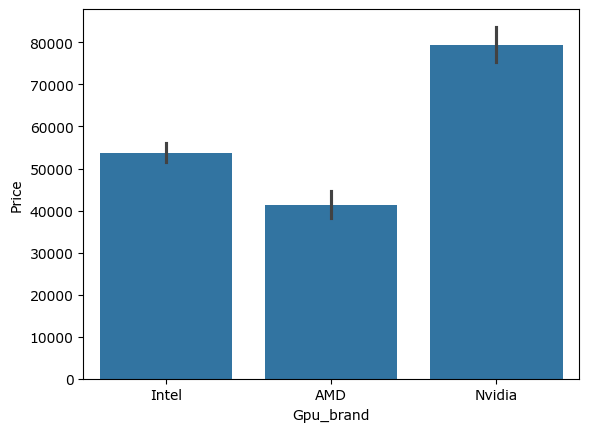

In [258]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])

In [259]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,Processers,PPI,Gpu_brand
734,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.0,51148.8000,0,2.5,Intel Core i5,Intel HD Graphics,Intel Core i5,175398.496241,Intel
641,HP,Notebook,8,1TB HDD,AMD Radeon R5,Windows 10,2.0,27753.5520,0,3.0,AMD A9-Series 9420,AMD Radeon,AMD Processer,95294.117647,AMD
1155,HP,Notebook,4,256GB SSD,AMD Radeon 520,Windows 10,1.0,25515.2592,0,2.5,AMD A6-Series A6-9220,AMD Radeon,AMD Processer,149538.461538,AMD
690,Acer,Notebook,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.0,19980.0000,0,1.6,Intel Celeron Dual,Intel HD Graphics,Other intel Processer,84260.571429,Intel
592,Dell,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.0,32127.8400,1,1.0,Intel Core M,Intel HD Graphics,Other intel Processer,101693.793103,Intel


In [260]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [268]:
df['Memory_space']=df['Memory'].apply(lambda x:x.split(" ")[0])

In [269]:
change = df['Memory'].apply(lambda x:x.split(" ")[0])

In [270]:
change 

0       128GB
1       128GB
2       256GB
3       512GB
4       256GB
        ...  
1298    128GB
1299    512GB
1300     64GB
1301      1TB
1302    500GB
Name: Memory, Length: 1302, dtype: object

In [262]:
df['Memory_space']=df['Memory_space'].str.replace("GB",'').str.replace("TB",'')

In [264]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,Processers,PPI,Gpu_brand,Memory_space
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.0,71378.6832,0,2.3,Intel Core i5,Intel Iris Plus Graphics,Intel Core i5,384962.406015,Intel,128
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.0,47895.5232,0,1.8,Intel Core i5,Intel HD Graphics,Intel Core i5,121804.511278,Intel,128
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.0,30636.0000,0,2.5,Intel Core i5,Intel HD Graphics,Intel Core i5,149538.461538,Intel,256
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.0,135195.3360,0,2.7,Intel Core i7,AMD Radeon Pro,Intel Core i7,420779.220779,AMD,512
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.0,96095.8080,0,3.1,Intel Core i5,Intel Iris Plus Graphics,Intel Core i5,384962.406015,Intel,256


In [265]:
df['Memory_space']=df['Memory_space'].apply(lambda x:1 if x == '1.0' else x).astype('int')

In [266]:
df['Memory_space'].unique()

array([128, 256, 512, 500,   1,  32,  64,   2,  16, 180, 240,   8, 508])

In [272]:
import re

df['ROM']=change.apply(lambda x:1 if "GB" in x else 0)

In [273]:
df['ROM'].value_counts()

ROM
1    1036
0     266
Name: count, dtype: int64

In [274]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [275]:
disk = df['Memory'].apply(lambda x:" ".join(x.split(' ')[1:]))

In [276]:
disk.unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

In [277]:
##Seprate the storage_type and ExtraSpace 
df['storage_type']=disk.apply(lambda x:x.split('+')[0])
df['Is_extraSpace'] = disk.apply(lambda x:1 if '+' in x else 0)

In [278]:
#1 for GB and  for TB
df['IS_GB'] = df['ROM']
del df['ROM']

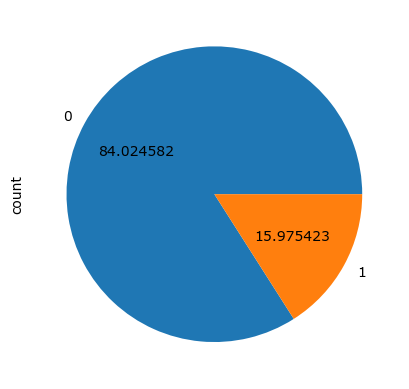

In [279]:
df['Is_extraSpace'].value_counts().plot.pie(autopct="%2f")
plt.show()

In [280]:
##remove memory after extracting information
df.drop('Memory',axis=1,inplace=True)

In [281]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IsToucScreen,Cpu_GHz,Processer,Gpu_type,Processers,PPI,Gpu_brand,Memory_space,storage_type,Is_extraSpace,IS_GB
469,Lenovo,Ultrabook,12,Intel HD Graphics 520,Windows 10,1.0,98994.2400,0,2.6,Intel Core i7,Intel HD Graphics,Intel Core i7,296228.571429,Intel,256GB,SSD,0,1
165,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,2.0,95850.7200,0,2.8,Intel Core i7,Nvidia GeForce GTX,Intel Core i7,149538.461538,Nvidia,256GB,SSD,1,1
80,Dell,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.0,58403.4048,0,1.6,Intel Core i5,Intel UHD Graphics,Intel Core i5,149538.461538,Intel,256GB,SSD,0,1
232,Lenovo,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,3.0,79866.7200,0,2.8,Intel Core i7,Nvidia GeForce GTX,Intel Core i7,149538.461538,Nvidia,256GB,SSD,1,1
1253,Lenovo,Notebook,8,Intel HD Graphics 520,Windows 10,1.0,57116.1600,0,2.3,Intel Core i5,Intel HD Graphics,Intel Core i5,166628.571429,Intel,256GB,SSD,0,1


In [282]:
df.corr(numeric_only=True)['Price']

Ram              0.742905
Weight           0.173350
Price            1.000000
IsToucScreen     0.192917
Cpu_GHz          0.430122
PPI              0.478387
Is_extraSpace    0.309485
IS_GB            0.217066
Name: Price, dtype: float64

In [283]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

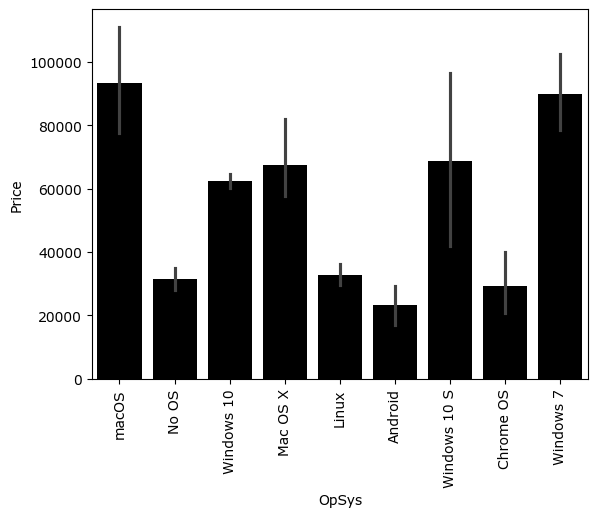

In [284]:
sns.barplot(x=df['OpSys'],y=df['Price'],color='black')
plt.xticks(rotation='vertical')
plt.show()

In [285]:
def cat_assign(text):
    if text == "Windows 10" or text== "Windows 7" or text=="Windows 10 S":
        return "Window"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac"
    else:
        return "Linux/other/no os"

In [286]:
df['OS']=df['OpSys'].apply(cat_assign)

<Axes: xlabel='OS'>

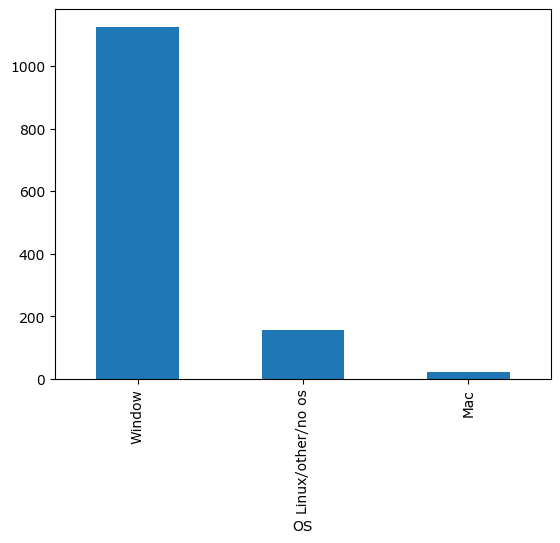

In [287]:
df['OS'].value_counts().plot.bar()

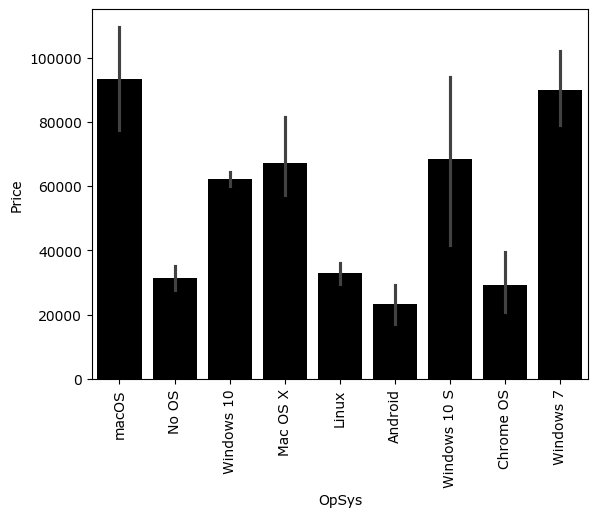

In [288]:
sns.barplot(x=df['OpSys'],y=df['Price'],color='black')
plt.xticks(rotation='vertical')
plt.show()

In [289]:
df['OS'] = df['OpSys']
del df['OpSys']

<Axes: ylabel='Density'>

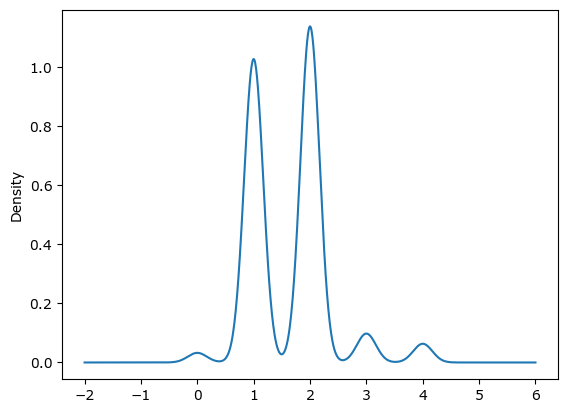

In [290]:
df['Weight'].plot.density()

<Axes: xlabel='Weight', ylabel='Price'>

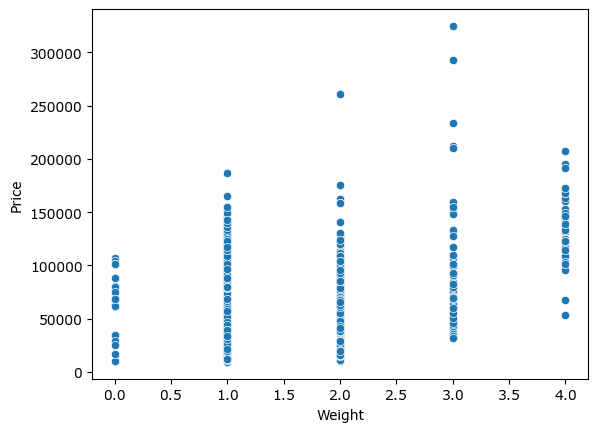

In [291]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: >

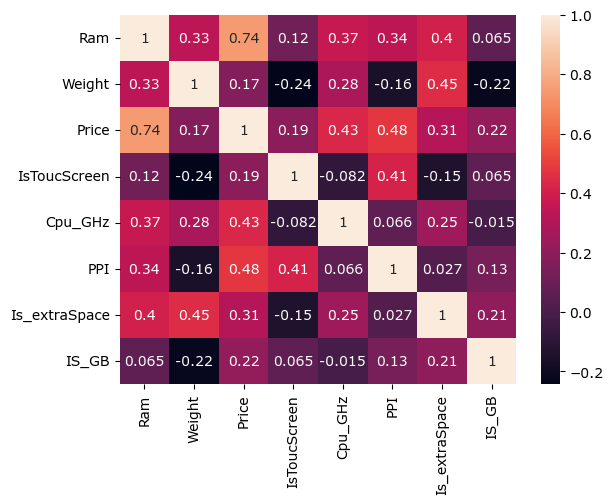

In [292]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'Log ')

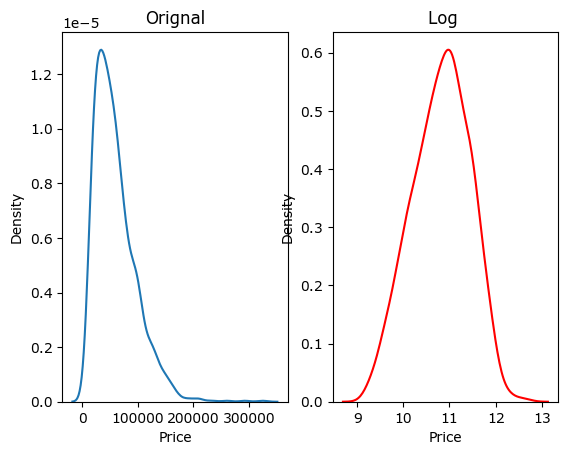

In [334]:
plt.figure()
plt.subplot(1,2,1)
sns.kdeplot(df['Price'])
plt.title('Orignal')

plt.subplot(1,2,2)
sns.kdeplot(np.log1p(df['Price']),color='red')
plt.title('Log ')

In [471]:
df.drop(['Gpu','Gpu_type'],axis=1,inplace=True)

In [472]:
df['storage_type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD ', 'Hybrid', 'Flash Storage ',
       'HDD '], dtype=object)

In [473]:
df['storage_type']=df['storage_type'].replace('Flash Storage ','Flash Storage')
df['storage_type']=df['storage_type'].replace('HDD ','HDD')

In [474]:
df['storage_type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'SSD ', 'Hybrid'], dtype=object)

In [502]:
X = df.drop('Price',axis=1)
y=df[['Price']]

In [503]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [504]:
X_train.shape

(1171, 14)

In [505]:
X_test.shape

(131, 14)

In [520]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [507]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### LinearRegression

In [548]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

0.8195112497621847


### ElasticNet

In [525]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = ElasticNet()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

0.7233129124648194


In [535]:
perform = {}

### KNN

In [546]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

score = r2_score(y_test,y_pred)
print(score)

0.568629455201791


### DecsisionTree

In [527]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

0.7807071272448438


### RandomForest

In [528]:
tep1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8283827873052938


### GradientBoosting

In [533]:
tep1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.8404967338670073


### AdaBoost

In [549]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

C:\Users\DELL\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7137900178173644


### XGboost

In [550]:
step1 = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,6,8,10,-1])
],remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))

0.8099491596221924


In [552]:
import pickle

In [558]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))